,File Name,Color Model,Format,Channels,File Size (MB),Width,Height,Full Path,Image
0,06ac332760d045914bd69e27f03746a2.png,RGBA,PNG,4,0.52,554,778,C:\Py\images4lab\06ac332760d045914bd69e27f03746a2.png,
1,1257a719cdb8f54fca2be44b083d11ad.jpg,RGB,JPEG,3,0.12,960,960,C:\Py\images4lab\1257a719cdb8f54fca2be44b083d11ad.jpg,
2,1585218623_12.jpg,RGB,JPEG,3,0.08,800,600,C:\Py\images4lab\1585218623_12.jpg,
3,40-409060_minions-funny-3-4k-hd-4k-wallpapers-hd.jpg,RGB,JPEG,3,0.20,3840,2160,C:\Py\images4lab\40-409060_minions-funny-3-4k-hd-4k-wallpapers-hd.jpg,
4,497799.png,RGBA,PNG,4,0.21,605,677,C:\Py\images4lab\497799.png,
5,5545f05a48b3e82f840cc7c5bb31e447.jpg,RGB,JPEG,3,0.02,640,640,C:\Py\images4lab\5545f05a48b3e82f840cc7c5bb31e447.jpg,
6,minion.png,RGBA,PNG,4,0.25,500,500,C:\Py\images4lab\minion.png,
7,minions-vacation-with-drink-cardboard-cut-out-37628-1-p.jpg,RGB,JPEG,3,0.05,900,900,C:\Py\images4lab\minions-vacation-with-drink-cardboard-cut-out-37628-1-p.jpg,
8,minions_PNG12.png,RGBA,PNG,4,1.40,1200,1200,C:\Py\images4lab\minions_PNG12.png,
9,OIP (1).jpg,RGB,JPEG,3,0.02,206,366,C:\Py\images4lab\OIP (1).jpg,

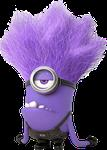
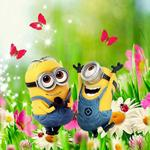
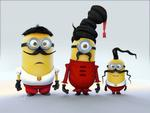
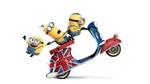
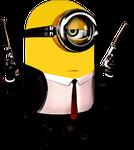
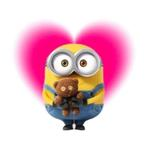
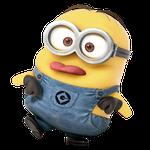
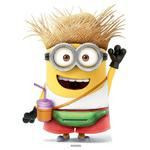
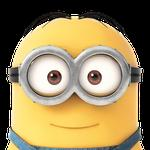
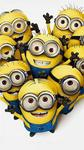
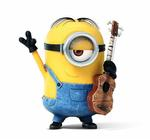
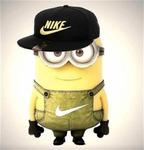
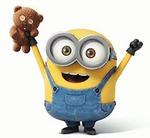
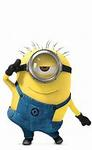
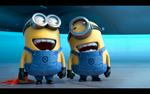
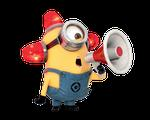

In [1]:
import os
import glob
import base64
import pandas as pd
from PIL import Image
from io import BytesIO
from IPython.display import HTML

def generate_thumbnail(file_path):
    img = Image.open(file_path)
    img.thumbnail((150, 150), Image.LANCZOS)
    return img

def encode_image_to_base64(image):
    if isinstance(image, str):
        image = generate_thumbnail(image)
    if image.mode != 'RGB':
        image = image.convert('RGB')
    with BytesIO() as buffer:
        image.save(buffer, 'JPEG')
        return base64.b64encode(buffer.getvalue()).decode()

def image_html_formatter(image):
    return f'<img src="data:image/jpeg;base64,{encode_image_to_base64(image)}">'

def create_image_dataframe(directory_path):
    image_data = []
    for file_path in glob.glob(os.path.join(directory_path, '*')):
        try:
            with Image.open(file_path) as img:
                file_name = os.path.basename(file_path)
                color_model = img.mode
                image_format = img.format
                num_channels = len(img.getbands())
                file_size_mb = round(os.path.getsize(file_path) / (1024 * 1024), 2)
                width, height = img.size
                full_file_path = os.path.abspath(file_path)
                image_data.append({
                    'File Name': file_name,
                    'Color Model': color_model,
                    'Format': image_format,
                    'Channels': num_channels,
                    'File Size (MB)': file_size_mb,
                    'Width': width,
                    'Height': height,
                    'Full Path': full_file_path,
                    'Image': file_path
                })
        except Exception:
            continue

    return pd.DataFrame(image_data)

# Використання функції
image_folder_path = r'C:\Py\images4lab'  # Замість цього вкажіть шлях до вашої папки
df_images = create_image_dataframe(image_folder_path)

# Виведення результату
HTML(df_images.to_html(formatters={'Image': image_html_formatter}, escape=False))


In [2]:
# Спочатку виконайте цей блок коду
from PIL import Image, ImageOps
import os
import random

def add_color_overlay(img, tint_color):
    overlay_colors = {
        "red": (255, 0, 0),
        "green": (0, 255, 0),
        "blue": (0, 0, 255),
        "yellow": (255, 255, 0),
        "magenta": (255, 0, 255),
        "cyan": (0, 255, 255),
    }
    img = img.convert("RGB")
    overlay = Image.new("RGB", img.size, overlay_colors[tint_color])
    return Image.blend(img, overlay, alpha=0.4)

def crop_image_to_square(img):
    min_dimension = min(img.size)
    left = (img.width - min_dimension) // 2
    top = (img.height - min_dimension) // 2
    right = left + min_dimension
    bottom = top + min_dimension
    return img.crop((left, top, right, bottom))

def create_poster(input_folder, output_file, num_rows, num_cols, image_size=250):
    image_files = [
        os.path.join(input_folder, file)
        for file in os.listdir(input_folder)
        if file.lower().endswith((".png", ".jpg", ".jpeg"))
    ]
    
    total_images = num_rows * num_cols
    if len(image_files) < total_images:
        raise ValueError(f"Недостатньо зображень. Потрібно: {total_images}, знайдено: {len(image_files)}.")

    poster_width = num_cols * image_size
    poster_height = num_rows * image_size
    poster_canvas = Image.new("RGB", (poster_width, poster_height))

    for row in range(num_rows):
        for col in range(num_cols):
            selected_image = random.choice(image_files)
            with Image.open(selected_image) as img:
                img = crop_image_to_square(img)
                img = img.resize((image_size, image_size))
                random_filter = random.choice(["red", "green", "blue", "yellow", "magenta", "cyan"])
                img = add_color_overlay(img, random_filter)
                poster_canvas.paste(img, (col * image_size, row * image_size))

    poster_canvas.save(output_file)
    return poster_canvas


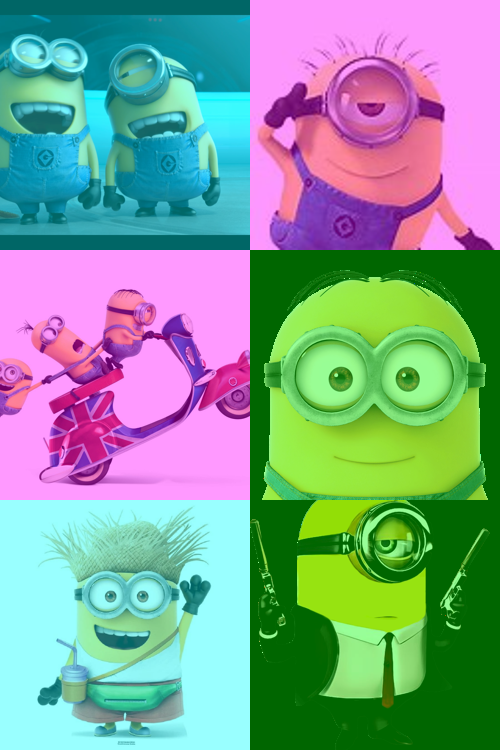

In [3]:
create_poster(r'C:\Py\images4lab', "poster_output3x2.jpg", 3, 2)

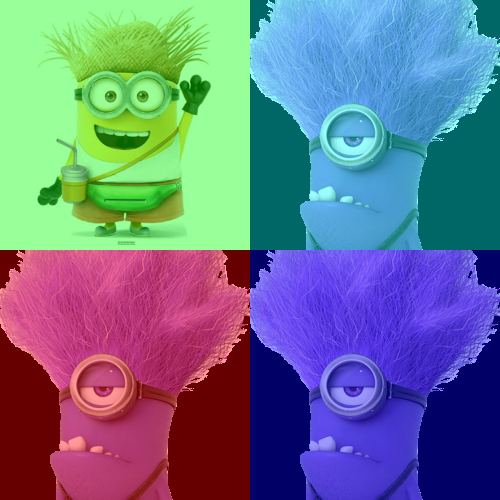

In [4]:
create_poster(r'C:\Py\images4lab', "poster_output2x2.png", 2, 2)

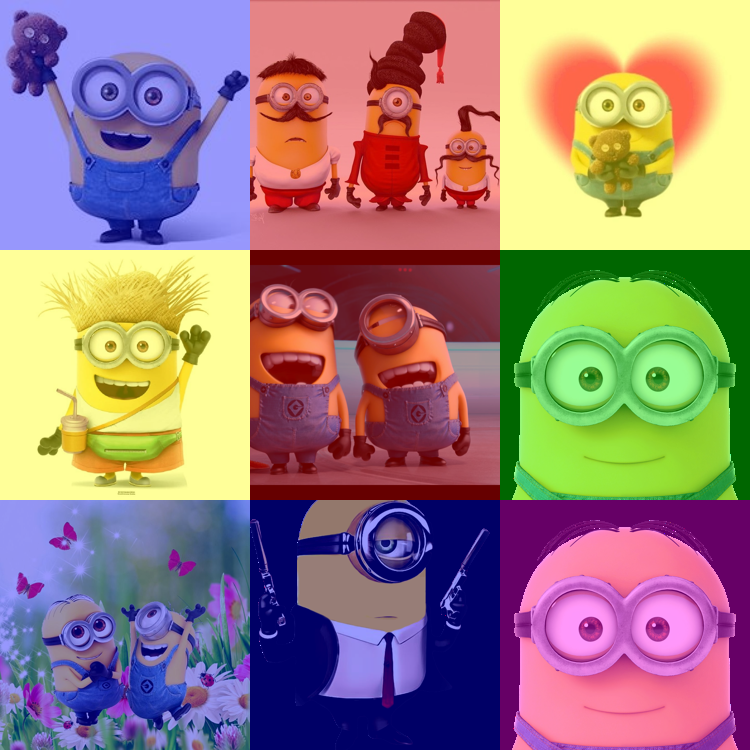

In [5]:
create_poster(r'C:\Py\images4lab', "poster_output3x3.jpg", 3, 3)